In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("../data/WHO-SIMPLE.csv")

In [2]:
#There are several columns that contain data on tabacco, but cover different years. This tests if the data sets are significantly
# different by Z score, and if it passes merges the data and drop the excess rows.
df_describe = df.describe()

M_Est_smk_curr_mean = df_describe['M_Est_smk_curr']['mean']
M_Est_smk_curr_std = df_describe['M_Est_smk_curr']['std']
TOBACCO_0000000192_mean = df_describe['TOBACCO_0000000192']['mean']
TOBACCO_0000000192_std = df_describe['TOBACCO_0000000192']['std']

z = abs(M_Est_smk_curr_mean-TOBACCO_0000000192_mean)/np.sqrt(np.square(M_Est_smk_curr_std) + np.square(TOBACCO_0000000192_std))
#z is 0.13860927158688063, which means the samples are statisticaly the same distribution. Can combine

df_tab = df[['M_Est_smk_curr','TOBACCO_0000000192']]

df['TABACCO'] = df_tab.mean(axis=1)

df = df.drop(columns=['M_Est_smk_curr','M_Est_smk_daily','TOBACCO_0000000192'])

df

,Country_Year,MDG_0000000001,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_543,WHS4_544,WHS8_110,...,WHS_PBR,WSH_2,WSH_3,WSH_SANITATION_SAFELY_MANAGED,GHED_CHEGDP_SHA2011,WHS9_85,Country Code,Year,GDP,TABACCO
0,AFG_1962,232.04606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1962.0,5.466667e+08,NaN
1,AFG_1963,227.83111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1963.0,7.511112e+08,NaN
2,AFG_1964,223.85301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1964.0,8.000000e+08,NaN
3,AFG_1965,219.92361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1965.0,1.006667e+09,NaN
4,AFG_1966,216.06007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1966.0,1.400000e+09,NaN
5,AFG_1967,212.38101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1967.0,1.673333e+09,NaN
6,AFG_1968,208.60752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1968.0,1.373333e+09,NaN
7,AFG_1969,204.69104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1969.0,1.408889e+09,NaN
8,AFG_1970,200.89747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1970.0,1.748887e+09,NaN
9,AFG_1971,197.07903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1971.0,1.831109e+09,NaN


In [3]:
#Get description of df values
print("Rows: " + str(df.shape[0]) + "\n", "Columns: " + str(df.shape[1] - 3) + "\n", 
      "Countries: " + str(df['Country Code'].nunique()) + "\n", "Years: " + str(df['Year'].nunique()))

Rows: 11289
 Columns: 30
 Countries: 191
 Years: 60


In [4]:
#Examine data frame and determine which year has the most complete data set
df.head()
df.describe()

df2 = df

df.groupby(['Year']).count().sum(axis=1)

df3 = df
df3 = df3.dropna(thresh=1000, axis=1)
df3

df2['SUM'] = df3.count(axis=1)
df2 = df2[df2['SUM'] > 16]
df2 = df2.dropna(thresh=1000, axis=1)
df2.columns
df2 = df2.drop(['SUM'], axis=1)

df = df2

df2

,Country_Year,MDG_0000000001,WHS4_100,WHS4_117,WHS4_129,WHS4_543,WHS4_544,WHS8_110,MCV2,LBW_NUMBER,LBW_PREVALENCE,MDG_0000000026,GHED_CHEGDP_SHA2011,Country Code,Year,GDP
91,AGO_2013,63.71525,54.0,54.0,54.0,71.0,48.0,59.0,NaN,176.5,15.6,269.0,2.73,AGO,2013.0,1.367099e+11
92,AGO_2014,60.54047,55.0,55.0,55.0,72.0,55.0,56.0,NaN,178.3,15.4,258.0,2.43,AGO,2014.0,1.457122e+11
93,AGO_2015,57.81665,59.0,55.0,55.0,64.0,57.0,51.0,26.0,180.2,15.3,251.0,2.61,AGO,2015.0,1.161936e+11
120,ALB_2000,24.09920,97.0,96.0,NaN,93.0,97.0,95.0,NaN,2.5,4.9,23.0,7.23,ALB,2000.0,3.480355e+09
121,ALB_2001,22.90855,97.0,96.0,NaN,93.0,97.0,95.0,90.0,2.3,4.8,23.0,7.14,ALB,2001.0,3.922099e+09
122,ALB_2002,21.66170,98.0,96.0,NaN,94.0,98.0,96.0,93.0,2.2,4.8,21.0,6.91,ALB,2002.0,4.348070e+09
123,ALB_2003,20.40409,97.0,97.0,NaN,95.0,97.0,93.0,93.0,2.1,4.8,21.0,7.06,ALB,2003.0,5.611492e+09
124,ALB_2004,19.10885,97.0,99.0,NaN,97.0,98.0,96.0,96.0,2.0,4.8,18.0,6.77,ALB,2004.0,7.184681e+09
125,ALB_2005,17.82718,98.0,98.0,NaN,98.0,97.0,97.0,97.0,1.9,4.8,22.0,6.34,ALB,2005.0,8.052076e+09
126,ALB_2006,16.54495,97.0,98.0,NaN,97.0,97.0,95.0,94.0,1.8,4.7,18.0,6.01,ALB,2006.0,8.896074e+09


In [5]:
#Get description of df values after filtering
print("Rows: " + str(df.shape[0]) + "\n", "Columns: " + str(df.shape[1] - 3) + "\n", 
      "Countries: " + str(df['Country Code'].nunique()) + "\n", "Years: " + str(df['Year'].nunique()))

Rows: 1240
 Columns: 13
 Countries: 145
 Years: 18


In [6]:
#Data without filter by year
counts = df.count()

counts

list(df.columns)

['Country_Year',
 'MDG_0000000001',
 'WHS4_100',
 'WHS4_117',
 'WHS4_129',
 'WHS4_543',
 'WHS4_544',
 'WHS8_110',
 'MCV2',
 'LBW_NUMBER',
 'LBW_PREVALENCE',
 'MDG_0000000026',
 'GHED_CHEGDP_SHA2011',
 'Country Code',
 'Year',
 'GDP']

In [7]:
def scatterplot_2vars(df, x, y):
    plt.scatter(df[x], df[y], color='green')
    plt.title('{} Vs {}'.format(x,y), fontsize=14)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.grid(True)
    plt.show()

def histogram(df, x):
    plt.hist(df[x], bins="auto", range=(0,df[x].max()))
    plt.title('{}'.format(x), fontsize=14)
    plt.xlabel(x, fontsize=14)
    plt.grid(True)
    plt.show()

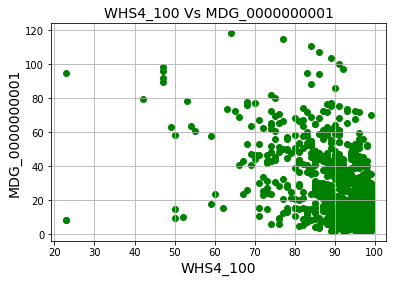

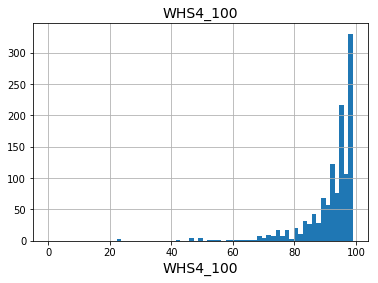

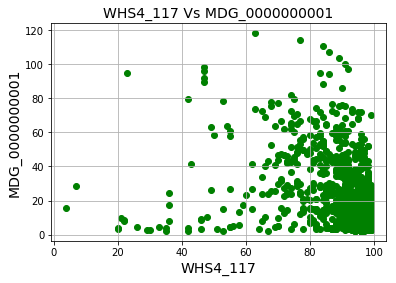

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:697: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:698: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


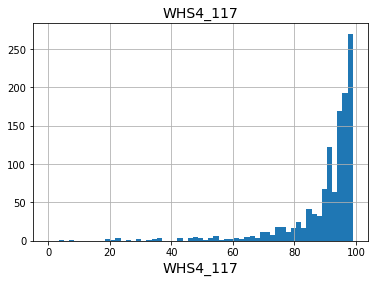

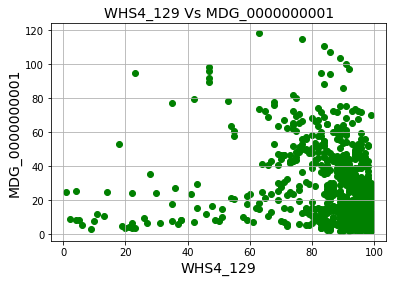

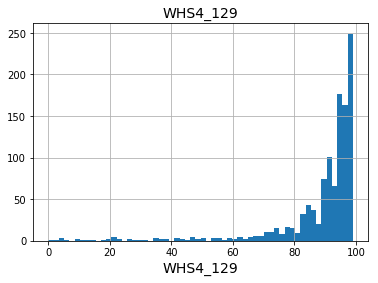

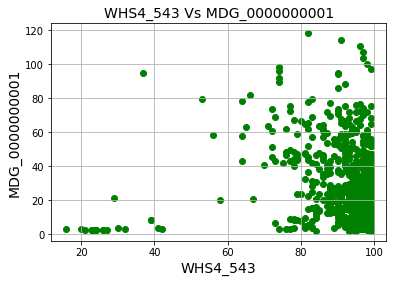

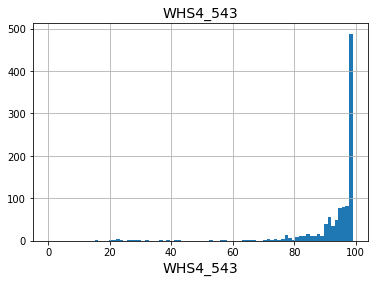

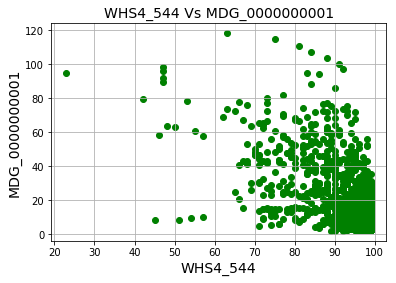

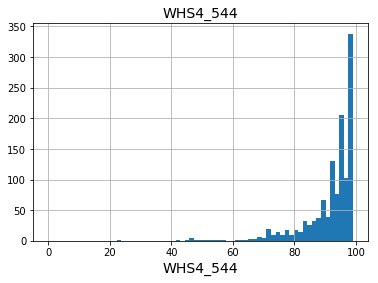

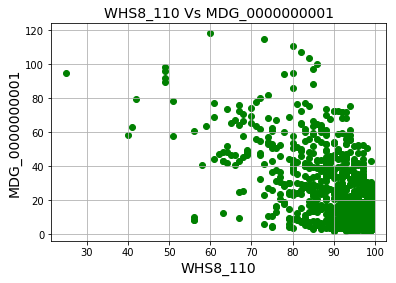

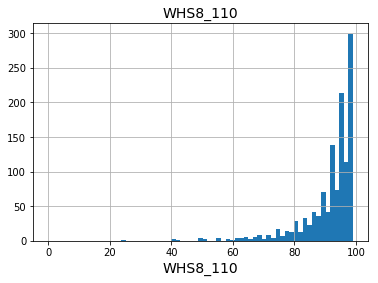

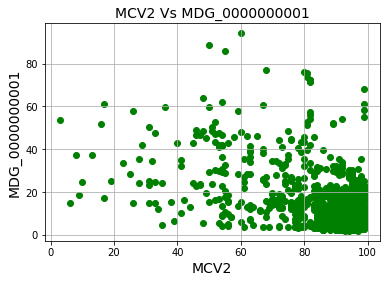

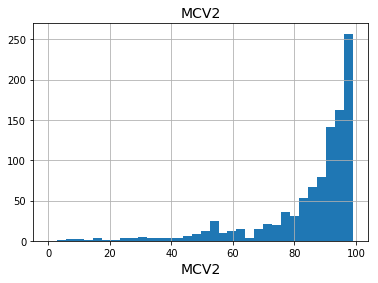

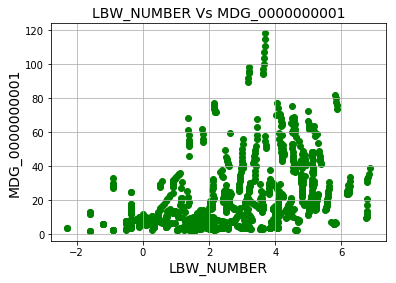

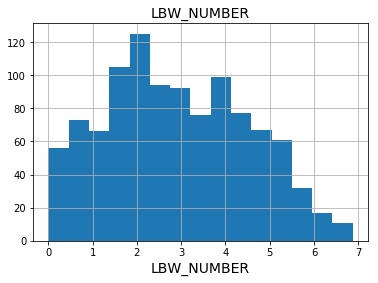

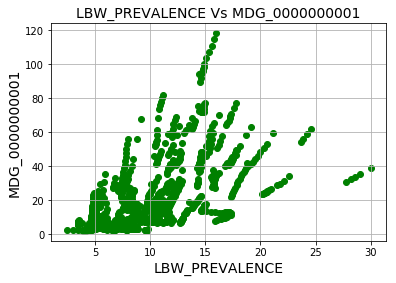

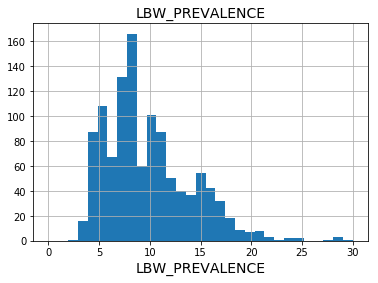

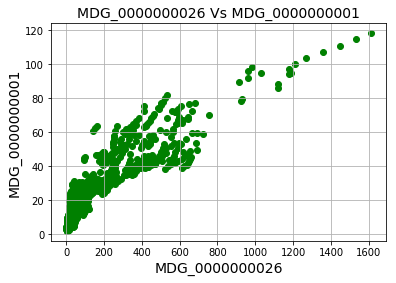

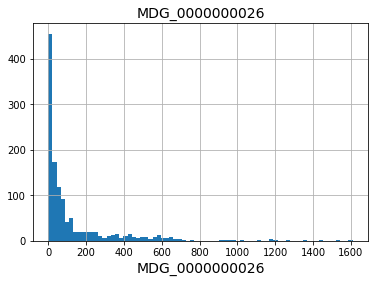

KeyError: 'WSH_SANITATION_SAFELY_MANAGED'

In [8]:
#This is to examine if the relationships are linear. Not all are, but many are good! A few may need a 
# transformation (ie GDP) and a few may not work ultimately
columns_of_interest = ['WHS4_100',
                       'WHS4_117', 'WHS4_129', 'WHS4_543', 'WHS4_544', 'WHS8_110', 
                       'MCV2', 'LBW_NUMBER', 'LBW_PREVALENCE',
                       'MDG_0000000026', 'WSH_SANITATION_SAFELY_MANAGED', 'GHED_CHEGDP_SHA2011',
                       'GDP', 'MDG_0000000003','MDG_0000000025']

df_transformed = df.copy()
df_transformed['GDP'] = np.log(df['GDP'])
df_transformed['LBW_NUMBER'] = np.log(df['LBW_NUMBER'])

for col in columns_of_interest:
    scatterplot_2vars(df_transformed, col, 'MDG_0000000001')
    histogram(df_transformed, col)

histogram(df_transformed, 'MDG_0000000001')



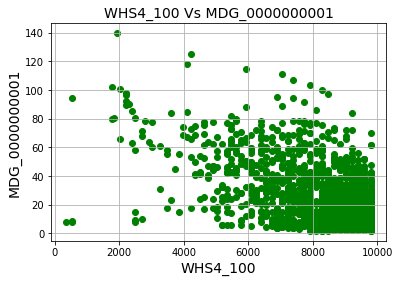

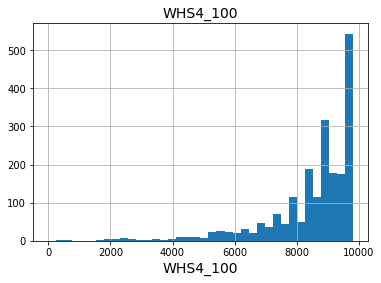

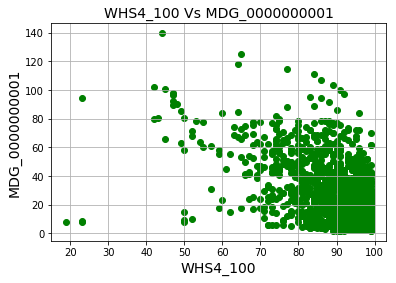

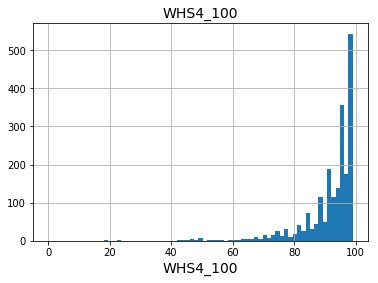

In [33]:
col='WHS4_100'

df_transformed[col] = np.square(df[col])

#np.sqrt
#np.log
#np.square

scatterplot_2vars(df_transformed, col, 'MDG_0000000001')
histogram(df_transformed, col)

scatterplot_2vars(df, col, 'MDG_0000000001')
histogram(df, col)

In [24]:
x_and_y_cols = columns_of_interest.copy()
x_and_y_cols.append('MDG_0000000001')
df_no_nan = df_transformed[x_and_y_cols].copy().dropna()

#center the variables
centered = preprocessing.scale(df_no_nan[x_and_y_cols], with_mean='True', with_std='False')

#convert back into a Pandas dataframe and add column names
centered_df = pd.DataFrame(centered, columns=x_and_y_cols)


X = centered_df[columns_of_interest] # Our multiple variables
Y = centered_df['MDG_0000000001']

In [25]:
len(X)

246

In [26]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 4.531766648144831e-16
Coefficients: 
 [ 0.08430436 -0.14316633  0.00581569 -0.01524148  0.10690225  0.03910953
 -0.04789528  0.58654545  0.0681889   0.4844076  -0.16958426 -0.21050174
 -0.444681    0.15147893  0.20563222]
                            OLS Regression Results                            
Dep. Variable:         MDG_0000000001   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     56.58
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           2.26e-68
Time:                        15:34:39   Log-Likelihood:                -158.96
No. Observations:                 246   AIC:                             349.9
Df Residuals:                     230   BIC:                             406.0
Df Model:                          15                                         
Covariance Type:            nonrobust                 

In [14]:
model.conf_int()

,0,1
const,-6.187302,41.045331
WHS4_100,-0.101234,0.228220
WHS4_117,-0.156764,-0.003018
WHS4_129,-0.017257,0.020204
WHS4_543,-0.079751,0.051753
WHS4_544,-0.062222,0.237135
WHS8_110,-0.105534,0.182904
MCV2,-0.058881,0.023486
LBW_NUMBER,1.183969,2.674757
LBW_PREVALENCE,-0.098371,0.400560
